In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ND_path_finder.src.data_generators.perlin_generator import PerlinNoiseGenerator
from ND_path_finder.src.data_samplers.random_sampler import sample_xarray

In [2]:
# Initialize the generator with 2D resolution
generator = PerlinNoiseGenerator(res=[100, 100], octv=4, seed=47, time_test=False)

# Generate Perlin noise data
xdataset = generator.perlin_data_xarray()
xdataset

<xarray.Dataset> Size: 200kB
Dimensions:       (points: 10000, dim: 2)
Coordinates:
    points        (points, dim) float64 160kB 0.0 0.0 0.0 ... 0.9899 1.0 1.0
Dimensions without coordinates: dim
Data variables:
    noise_values  (points) int32 40kB 1 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1
Attributes:
    octaves:     4
    resolution:  [100, 100]
    dimensions:  2

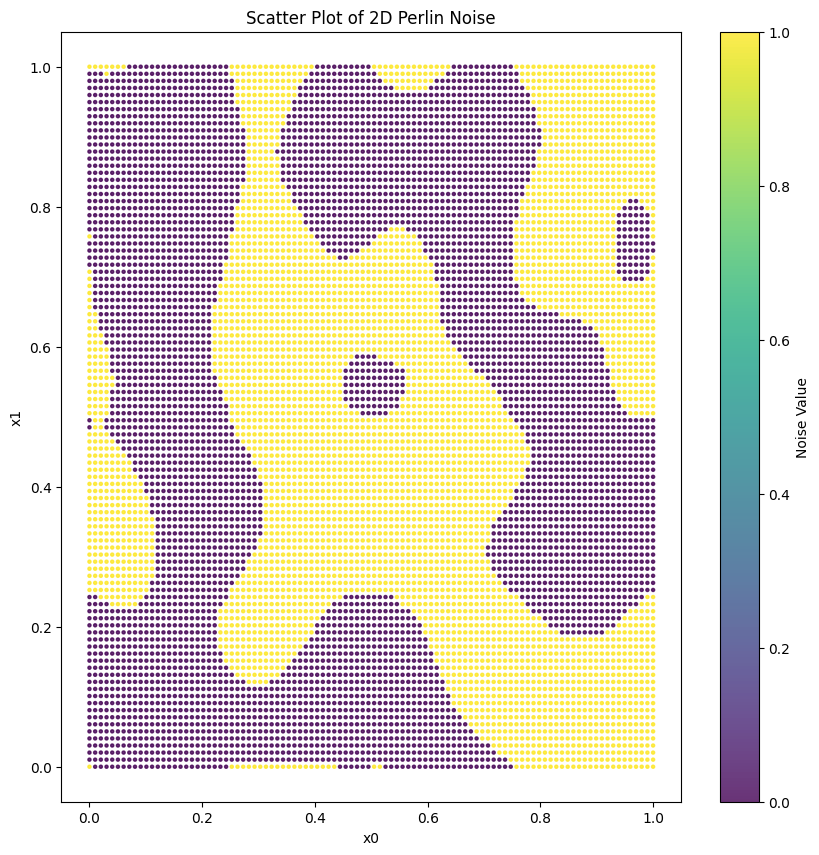

In [3]:
generator.plot_2D_xarray()

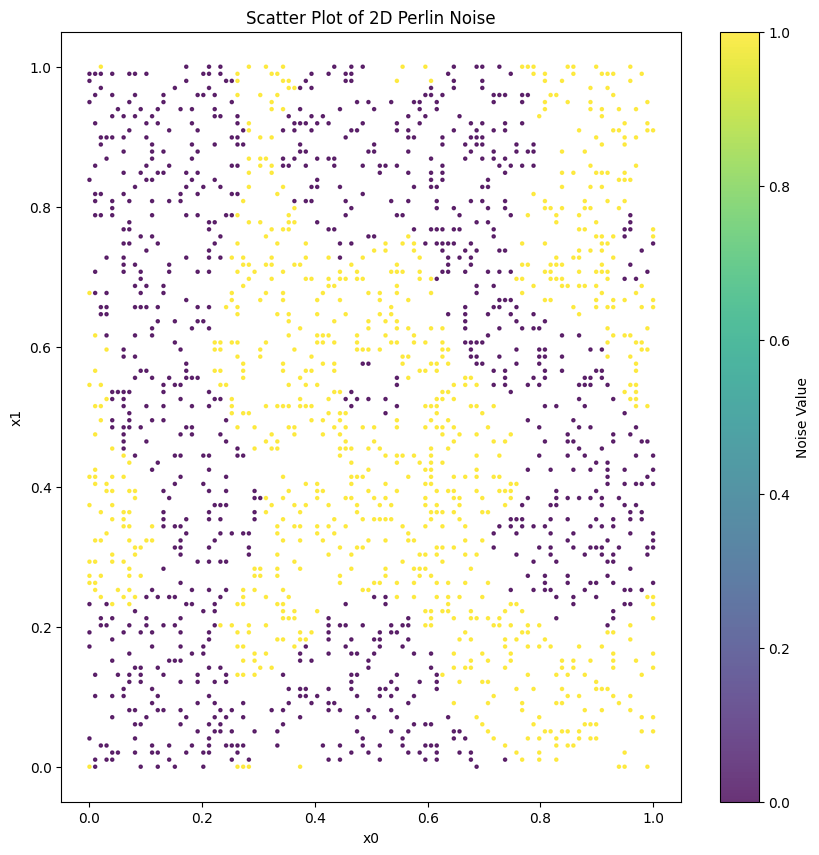

In [6]:
sampled_xdataset = sample_xarray(xdataset, 1800)

generator.plot_2D_xarray(sampled_xdataset)